# 特征工程简介

## 1.什么是特征工程

**特征工程**是**数据科学**和**机器学习**流水线上的重要一环，包括**识别**、**清洗**、**构建**和**挖掘**数据的**新特征**，为进一步**解释（理解）数据**并进行**预测性分析**做准备。

【定义】**特征工程（feature engineering）** 是将数据转换为能更好地表示潜在问题的特征，从而提高机器学习性能的过程。具体包括：

- 转换数据的过程：清洗、过滤等
- 特征：对机器学习过程有意义的数据属性
- 更好地表示潜在问题：能够代表某个领域的某个问题
- 提高机器学习性能：特征工程的最终目的是为了获得更好的数据，以便学习算法从中挖掘模式，取得更好的效果。


## 2.特征工程的重要性

数据科学家工作中80%的时间都用在捕获、清洗和组织数据上，构造机器学习流水线所花费的时间不到20%，却占据着主导地位。下图展示了数据科学家进行不同工作的时间比例。

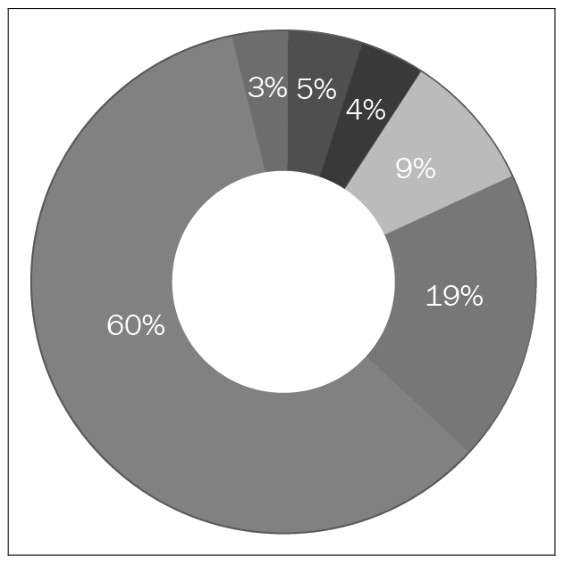

数据科学家工作占比如下：

- 设置训练集：3%
- 清洗和组织数据：60%
- 收集数据集：19%
- 挖掘数据模式：9%
- 调整算法：5%
- 其他：4%

## 3.数据和机器学习

### 数据

通常数据都是表格形式的，按行列组织。其中每**行**称为观察值，代表问题的一个**实例**或样本；每**列**称为**属性**，也就是**特征**。

### 机器学习

#### 监督学习

监督学习算法专门处理预测一个值的任务，通常是用数据中的其他属性来预测余下的一个属性。以如下表所示的网络入侵的数据集为例：

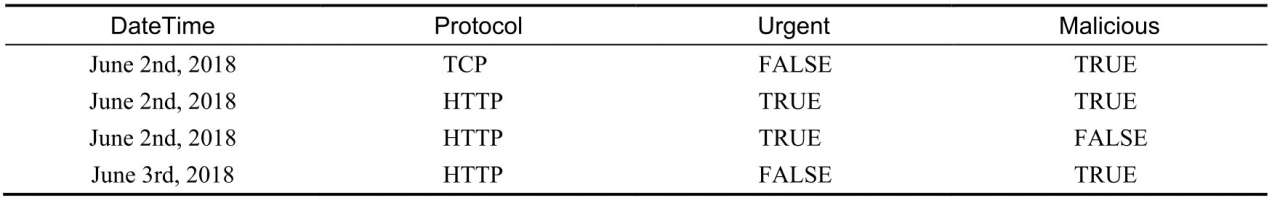

该数据集的每行代表一次用户连接，有4个属性，分别DateTime、Protocol、Urgent和Malicious。其中Malicious属性的值表示该次连接是否为恶意入侵。这里根据前3个属性（DateTime、Protocal和Urgent）来预测Malicious属性值的问题便是监督学习问题，其目标是建立DateTime、Protocal和Urgent属性与Malicious的映射：

In [13]:
import pandas as pd
data_set = {
    'datetime': ['2018/06/02', '2018/06/02', '2018/06/02','2018/06/03','2018/06/03'],
    'protocol': ['tcp', 'http', 'http', 'http','http'],
    'urgent': [False, True, True, False, False]
}
network_features = pd.DataFrame(data_set)
network_features

,datetime,protocol,urgent
0,2018/06/02,tcp,False
1,2018/06/02,http,True
2,2018/06/02,http,True
3,2018/06/03,http,False
4,2018/06/03,http,False


In [10]:
network_response = pd.Series([True, True, False, True, False])
network_response

0     True
1     True
2    False
3     True
4    False
dtype: bool

在监督学习中，一般将数据集中希望预测的属性叫做响应（response)或标签（label）,其余的属性叫做特征（feature）。

#### 无监督学习

监督学习的目的是预测，即利用数据的特征对响应进行预测，为决策提供帮助。如果不是要预测，而是要通过对数据进行变换以提取新的特征，便要用到无监督学习。如基于营销数据的市场细分：

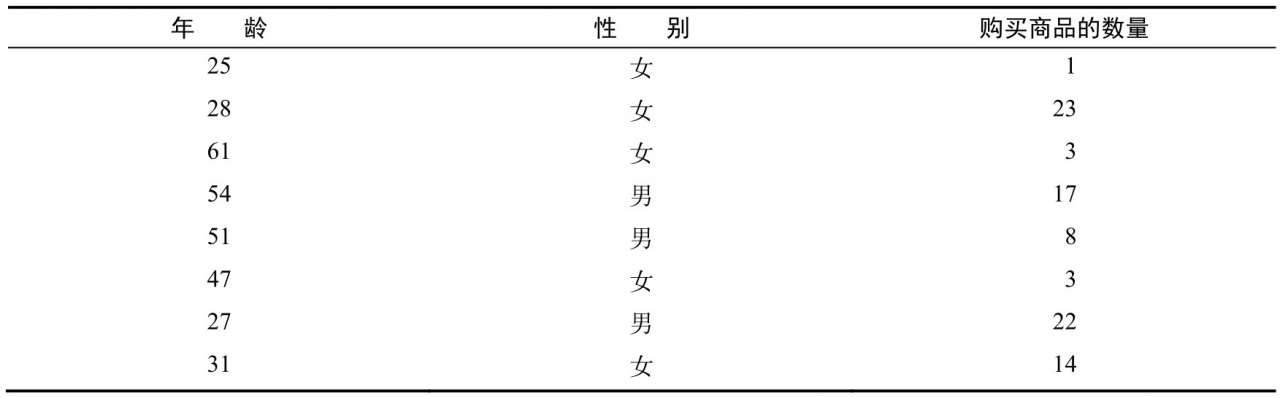

假如营销数据集很大（100万行），每行是一个人的基本特征（年龄、性别等）以及购买商品的数量。我们的目标是将这个数据集细分为不同的类型或聚类，让公司更好地理解客户资料。**聚类**是一个典型的无监督学习算法，会创造一个新的特征，将顾客划分到不同类型或聚类中。

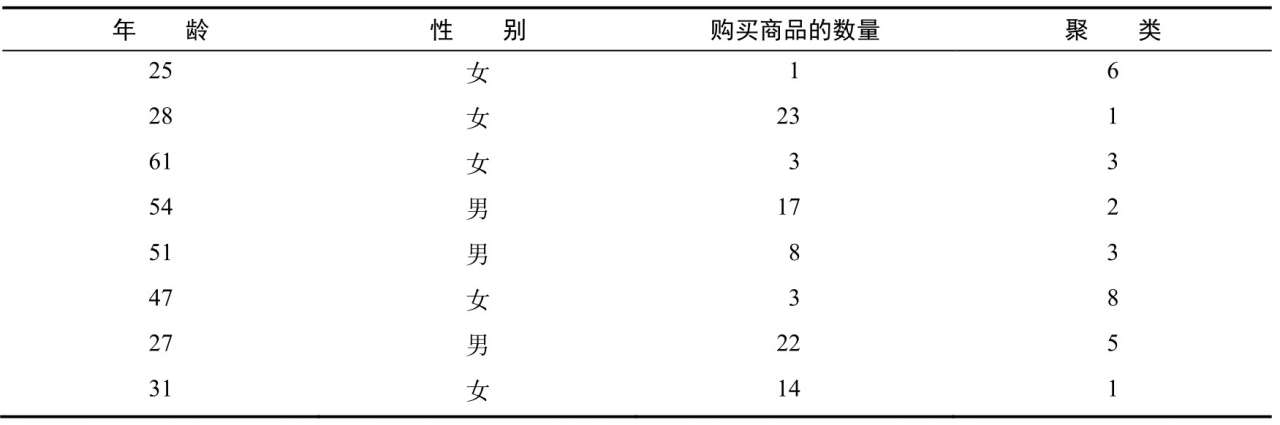

## 4.机器学习算法和特征工程的评估

### 特征和属性的区别

- **属性**一般是表格数据的**列**
- **特征**一般只值代对机器学习算法有益的属性。

### 特征工程的评估步骤

1. 在应用任何特征工程之前，得到机器学习模型的基准性能
2. 应用一种或多种特征工程
3. 对于每种特征工程，获取一个性能指标，并与基准性能进行对比
4. 如果性能的增量（变化）大于某个阈值，则认为这种特征工程是有益的，并在机器学习流水线上应用
5. 性能的改变一般以百分比计算



### 监督学习算法的评估

一般而言，可以将监督学习分为两种更具体的类型：分类（预测定性响应）和回归（预测定量响应）

- 对于分类问题，直接用**5折交叉验证**计算**逻辑回归**模型的**准确率**：

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = features
y = response

lr = LogisticRegression()

scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
scores

- 对于回归问题，用**线性回归**的**均方差**（MSE，mean squared error）进行评估，同样使用5折交叉验证

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = features
y = response

lr = LinearRegression()

scores = cross_val_score(lr, X, y, cv=5, scoring='mean_squared_error')
scores

### 无监督学习算法的评估

因为无监督学习不做出预测，所以不能直接根据模型预测的准确率进行评估。如果进行的是**聚类**分析，通常会利用**轮廓系数**(silhouette coefficient，表示聚类分离性的变量，在-1~1之间）加上人工分析来确定特征工程是否提升了性能。

In [ ]:
from sklearn.metrics import silhouette_score

X = features
y = labels_from_clustering

scores = silhouette_score(X, y)

通常在以下3个领域对特征工程的好处进行量化：

- 监督学习（即预测分析）
  - 回归 - 预测定量数据：主要使用均方误差作为测量指标
  - 分类 - 预测定性数据：主要使用准确率作为测量指标  
- 无监督学习（聚类-将数据按特性进行分类）
  - 主要用轮廓系数作为测量指标  
- 统计检验：用相关系数、t检验、卡方检验，以及其他方法评估并量化原始数据和转换后数据的效果